# **Problem**

**A renowned chain of hospitals is facing a problem of increased overload on resources (human as well as medical) due to a rise in the number of COVID cases. They want your help to build an AI solution that will help them predict the likelihood of a patient being infected by COVID by analyzing a chest X-ray scan of the patient to segregate the patients who are less likely to have COVID and prioritize critical cases.**

# **AI Solution Workflow**

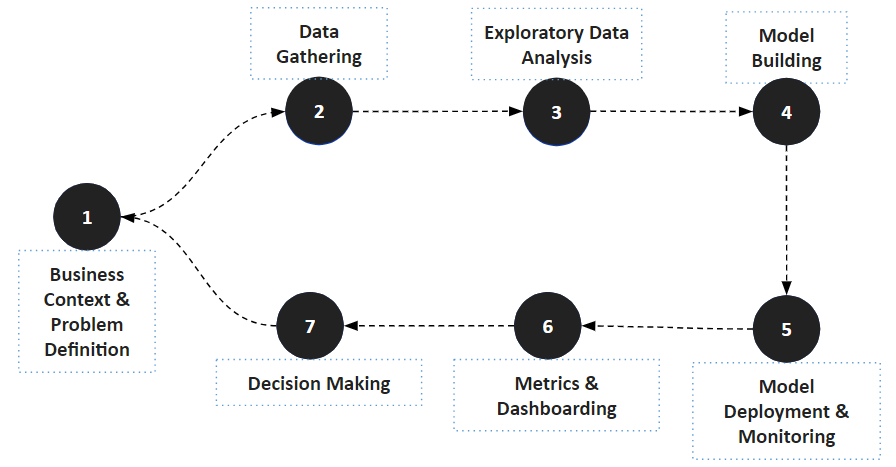

# **Business Context and Problem Definition**

## Business Context

First identified in December 2019 in the city of Wuhan in China, COVID is caused by a novel coronavirus known as SARS-CoV-2, after the initial outbreak, COVID rapidly spread within China and subsequently to other countries around the world. The World Health Organization (WHO) declared it a global pandemic in March 2020 due to its widespread transmission and impact on public health. Common symptoms of COVID include fever, cough, fatigue, shortness of breath, muscle or body aches, sore throat, loss of taste or smell, headache, and in severe cases, difficulty breathing or pneumonia. It's important to note that some individuals infected with SARS-CoV-2 may remain asymptomatic, meaning they show no noticeable symptoms but can still spread the virus to others. The severity of COVID can vary from mild to severe. Most individuals experience mild to moderate symptoms and recover without requiring hospitalization. Severe cases may require hospitalization, intensive care, and mechanical ventilation. Testing for COVID involves various methods, including molecular (PCR) and antigen tests, as well as chest X-ray scans.



## Problem Statement

Traditional testing methods (like the RT-PCR test), despite being the gold-standard, are time-consuming and resource-intensive. **The RT-PCR test generally involves 3 stages (sample collection, extraction, PCR) with a 4-hour turnaround time (TAT) for the test results in general**. This results in long wait times in detecting COVID and with an increase in the number of screenings, the wait time increases further.

**With a rapid increase in the number of cases, hospitals face challenges in terms of staffing and logistics**. The healthcare system is grappling with the need for swift and accurate COVID detection to curb the spread of the virus. Testing every case with mild symptoms becomes impractical and **it becomes important to set up criteria for RT-PCR testing to reduce the turnaround time of test results and control the spread of the virus**.

A renowned chain of hospitals have decided to leverage AI to deal with the crisis situation. They want to build an AI system to predict the chances of a patient being COVID positive by identifying patterns in chest X-ray scans.

## Solution Approach

The AI solution approach involves the scanning of chest X-rays of patients to detect patterns commonly found in COVID-infected people. **Conducting a chest X-ray scan and obtaining the resultant scan image for a patient requires approx. 15 minutes**.  The chest X-rays can be passed to our AI solution and based on the likelihood of COVID.

This methodology can provide the following advantages to hospital:

- Segregating cases of mild symptoms with lower chances of COVID from the critical cases
- Reduced TAT for test results, leading to quicker diagnosis
- Early detection of signs of COVID infection, even before symptoms become severe
- Resource-efficiency as X-ray machines are commonly available in medical facilities
- Isolation of patients to contain the further spread of COVID to unaffected people

The X-ray based detection can be used in conjunction with RT-PCR testing to increase the accuracy of diagnosis.

#**Data Gathering**

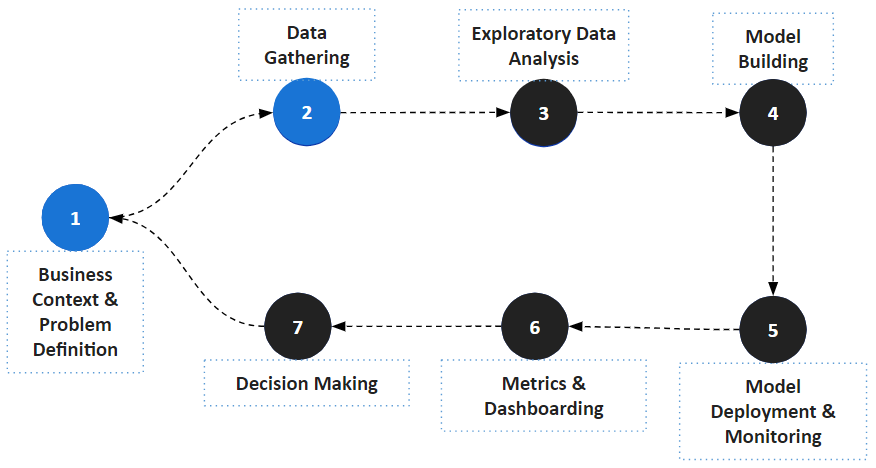

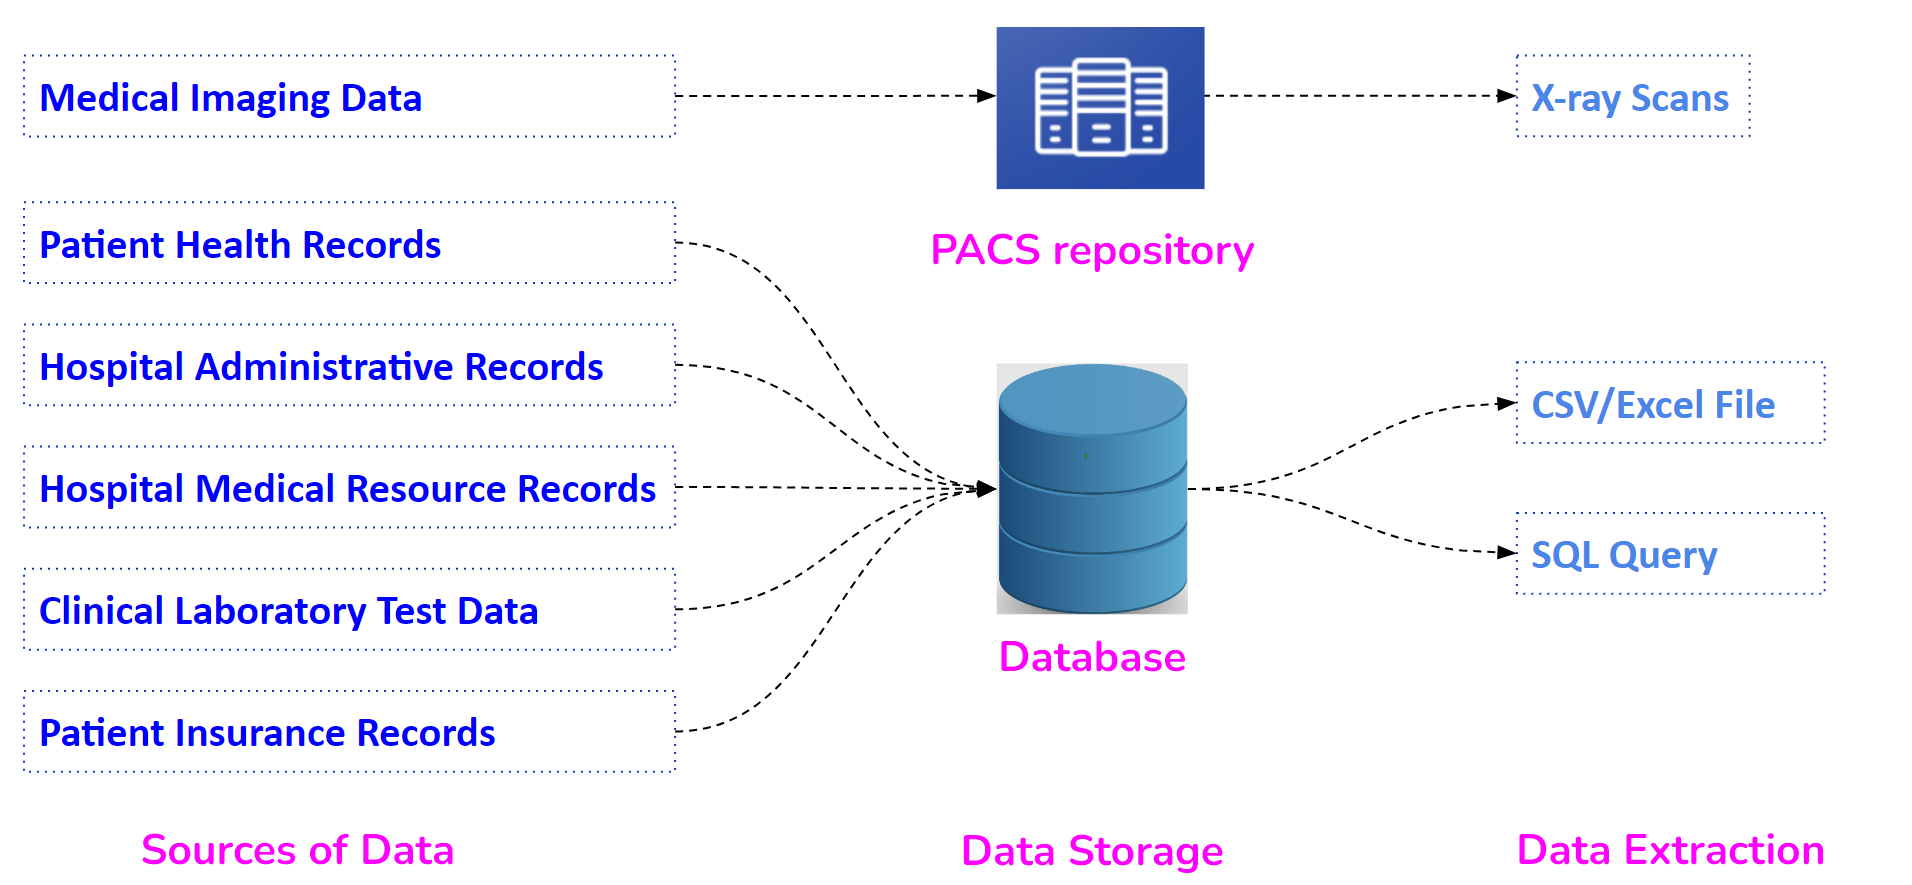

**The data needed for buidling any AI solution is usually obtained from multiple sources.**

In the current scenario, we have the following sources:

- **Medical Imaging Data**: This includes infomration such as X-rays, CT scans, MRI scans, ultrasounds, and other types of medical images used for diagnosing and monitoring conditions.

- **Patient Health Records**: This includes information such as patient medical history, medications, and test results.

- **Hospital Administrative Records**: This includes data related to scheduling appointments, managing patient admissions and discharges, billing, insurance claims, and other administrative tasks.

- **Hospital Medical Resource Records**: Includes information about medical supplies, equipment inventory, maintenance schedules, and usage. These records optimize resource allocation, enhance patient care, streamline operations, and ensure timely availability of critical medical assets while adhering to efficient inventory management practices.

- **Clinical Laboratory Test Data**: Data generated from various medical tests, such as blood tests, urine tests, tissue samples, and genetic tests.

- **Patient Insurance Records**: This includes data related to patients' health insurance coverage, claims, and reimbursement.

The data from different sources are collected and stored in an organized and secure manner in databases and PACS (Picture Archiving and Communication Systems) repositories. Once the data is stored, we can extract necessary data in multiple ways.

- **Data from Databases**
    - **Export as CSV/Excel File:** This method allows for exporting a selected subset or the entire dataset in a CSV (Comma-Separated Values) or Excel file format, which can be easily opened and analyzed using spreadsheet software or using programming languages like Python.
    - **Querying from the database:** This involves running SQL (Structured Query Language) queries on the database to retrieve specific data based on predefined conditions, allowing for more targeted and customized data extraction for analysis or reporting purposes. The SQL queries can be executed using programming languages like Python by establishing a connection to the database
- **Data from PACS**
    - Extracting data from a Picture Archiving and Communication System (PACS) database involves several steps. Ensure you have access authorization and are familiar with DICOM (Digital Imaging and Communications in Medicine) protocols. Identify relevant DICOM tags and use the DICOM Query/Retrieve protocol to query for specific images. Retrieve the images, potentially transferring them locally. Utilize DICOM toolkits in programming languages like Python to construct queries, receive responses, and process images.


#### **For the scope of this session, we will be using X-ray images extracted from a PACS to showcase the end-to-end solution.**
- The X-ray images were sampled randomly from the PACS
- **We'll load the data sample into a Python notebook for illustration.**


## Importing the necessary libraries

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
!pip install gradio==4.38.0 -q

In [ ]:
import tensorflow as tf
from tensorflow import keras
import gradio as gr

print("✅ TensorFlow:", tf.__version__)
print("✅ Keras:", keras.__version__)
print("✅ Gradio:", gr.__version__)


✅ TensorFlow: 2.18.0
✅ Keras: 3.8.0
✅ Gradio: 4.38.0


In [ ]:
# Core Libraries
from IPython import display
import os
import math
import random as python_random
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # <-- FIXED
from keras import layers  # model building still works

# Image Processing
import cv2
from PIL import ImageFilter

# Model Evaluation
from sklearn.metrics import recall_score, confusion_matrix

# Deployment
import joblib
import gradio as gr

# Reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)



## Loading the data

In [ ]:
# Importing using Google Colab

# Connecting Google Drive to this Python notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# extracting the data from the zipped file
!unzip "/content/drive/MyDrive/Colab Notebooks/X-ray Data.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/X-ray Data.zip
replace Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Data/.DS_Store          
replace Data/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Data/test/Covid/0100.jpeg  
replace Data/test/Covid/0102.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/test/Covid/0102.jpeg  
  inflating: Data/test/Covid/0105.png  
  inflating: Data/test/Covid/0106.jpeg  
  inflating: Data/test/Covid/0108.jpeg  
  inflating: Data/test/Covid/0111.jpg  
  inflating: Data/test/Covid/0112.jpg  
  inflating: Data/test/Covid/0113.jpg  
  inflating: Data/test/Covid/0115.jpeg  
  inflating: Data/test/Covid/0118.jpeg  
  inflating: Data/test/Covid/0119.jpeg  
  inflating: Data/test/Covid/0120.jpg  
  inflating: Data/test/Covid/094.png  
  inflating: Data/test/Covid/096.png  
  inflating: Data/test/Covid/098.jpeg  
  inflating: Data/test/Covid/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_

In [ ]:
# defining the dimensions of the images
height, width = 224, 224
# defining how many images to load in one go
batch_size=64

def generate_data(DIR):
    # ImageDataGenerator is a function from tensorflow to perform rescaling, resizing, rotation, and other transformations.
    datagen = ImageDataGenerator(rescale=1./255.)

    # flow from directory is used to generate batches of image data from a directory structure, allowing for efficient loading and preprocessing of image data during model training or evaluation.
    generator = datagen.flow_from_directory(
        DIR,
        batch_size=batch_size,
        shuffle=True,                                                          # shuffles the order of images while generation
        seed=42,
        class_mode='sparse',
        target_size=(height, width),
        classes={'Normal': 0, 'Viral Pneumonia': 1,'Covid': 2}
    )
    return generator

# defining the file path where training and testing images are stored
TRAINING_DIR = '/content/Data/train'
TESTING_DIR = '/content/Data/test'

train_data = generate_data(TRAINING_DIR)                                       # generate data for training
test_data = generate_data(TESTING_DIR)                                         # generate data for testing

total_image = np.concatenate([train_data.labels,test_data.labels])             # used to access the labels associated with the images

Found 231 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


# **Exploratory Data Analysis**

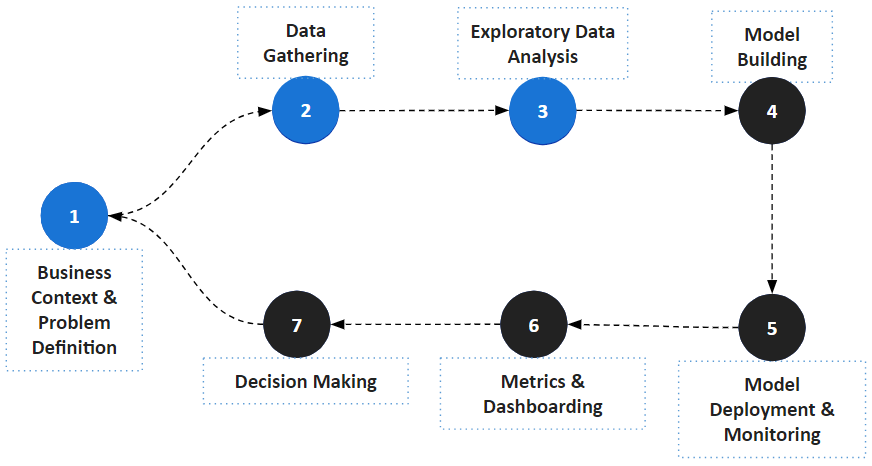

Exploratory Data Analysis (EDA) plays a very important role in an end-to-end AI solution. It enables

- **Understanding the Data**
- **Identifying Data Patterns and Insights**
- **Feature Selection and Engineering**

## EDA

### Distrbution of Image Types

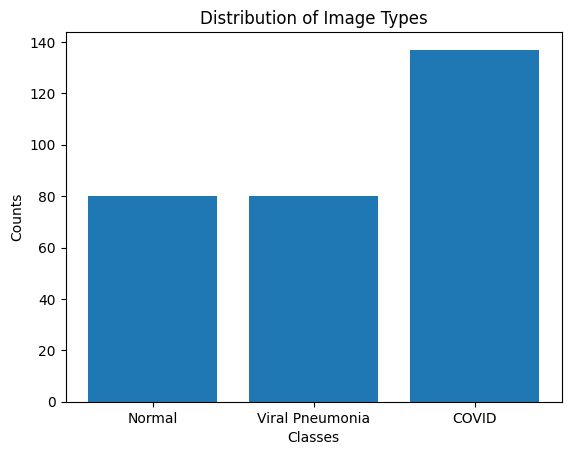

In [ ]:
counts = {
    'Normal': len(np.where(total_image == 0)[0]),                              # Calculating the count of Normal images
    'Viral Pneumonia': len(np.where(total_image == 1)[0]),                     # Calculating the count of Viral Pneumonia images
    'COVID': len(np.where(total_image == 2)[0])                                # Calculating the count of COVID images
}

# Extract class labels and corresponding counts
class_labels = list(counts.keys())
class_counts = list(counts.values())

# Create the bar plot
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Image Types');

### Visual Inspection of Different Images

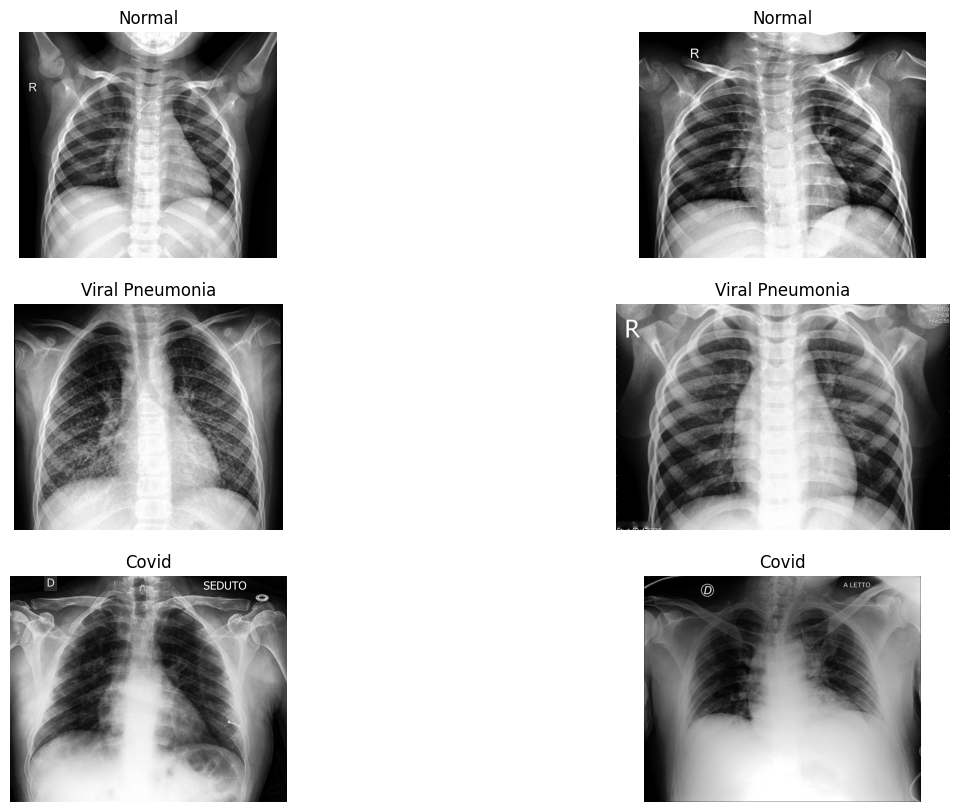

In [ ]:
def image_plot(generator, images_per_class):
    # Get the mapping of class names to indices
    class_indices = generator.class_indices
    # Extract the class names from the indices
    class_names = list(class_indices.keys())

    # Create a figure to display the images
    plt.figure(figsize=(15, 10))

    # Loop through each class index and its corresponding class name
    for class_idx, class_name in enumerate(class_names):
        # Get the indices of images belonging to the current class
        class_indices = [i for i, value in enumerate(generator.classes) if value == class_idx]
        # Select a subset of indices for the current class based on 'images_per_class'
        selected_indices = class_indices[:images_per_class]

        # Loop through the selected indices and display the images
        for i, idx in enumerate(selected_indices):
            # Create a subplot for each image
            ax = plt.subplot(len(class_names), images_per_class, class_idx * images_per_class + i + 1)
            # Load and display the image
            img = plt.imread(generator.filepaths[idx])
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")

# Assuming 'train_data' is your image generator
images_per_class = 2
image_plot(train_data, images_per_class)
plt.show()

## EDA Results

**Distribution of Image Types**

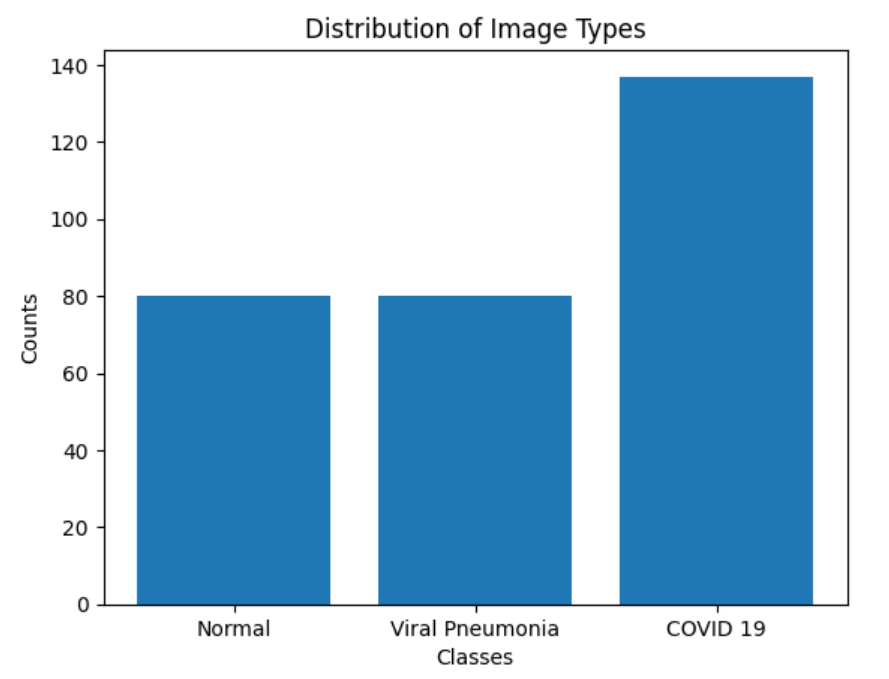

**Types of Images**

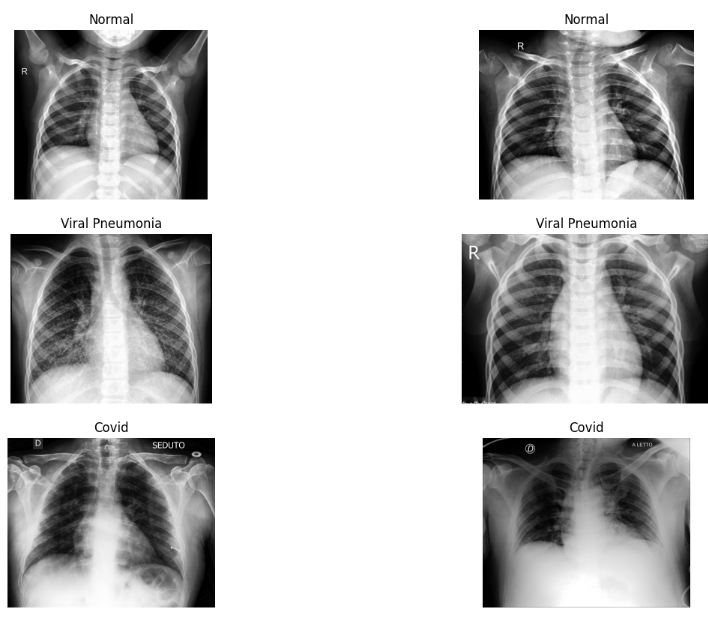

Identifying COVID vs non-COVID cases through manual observation of medical images poses a formidable challenge due to the subtle visual differences. The human eye's limitations can lead to extended diagnosis times and potential inaccuracies, especially when dealing with a considerable volume of patient data. Additionally, this process can be time-consuming and prone to subjectivity.

So, we need an AI model that can do the following:

* Take the X-ray image as input
* Learn the patterns from the input images
* Build a mathematical model using these patterns to forecast the likelihood of a patient having COVID
* Predicting the probability of COVID infection for new cases



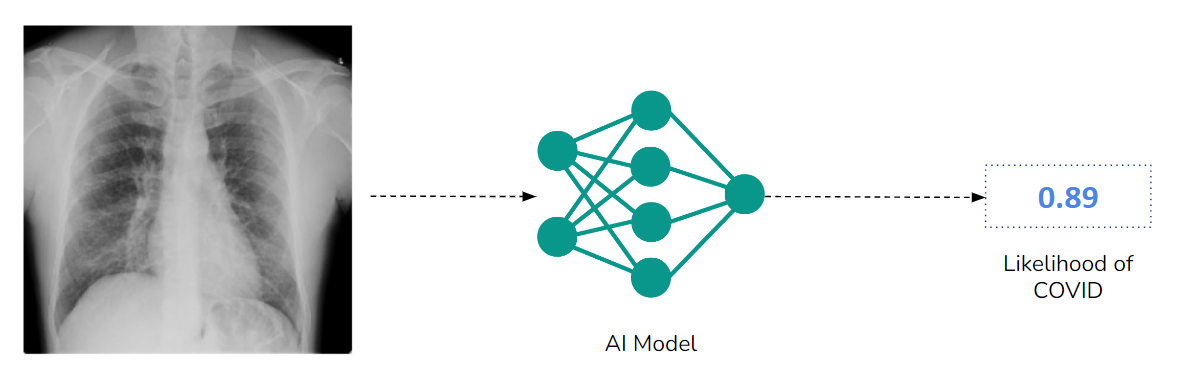

# **Model Building**

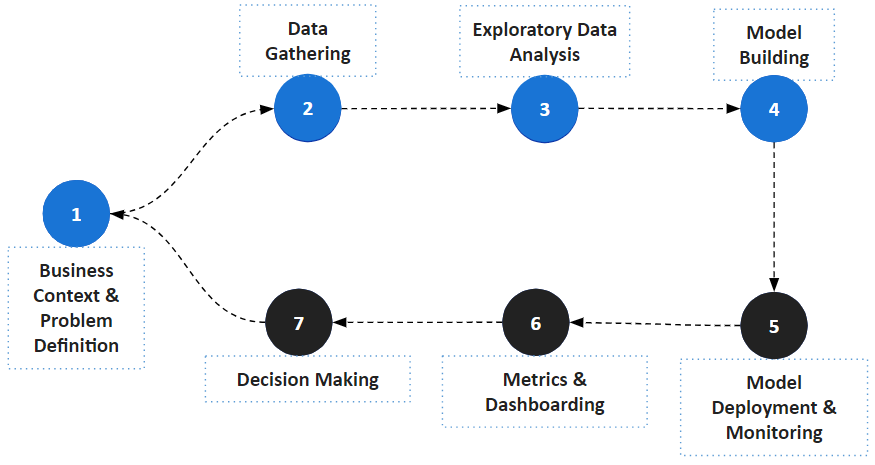

**The AI model is the 'heart' of our AI solution.** The model serves as the core component that brings intelligence and functionality to an end-to-end AI solution. It leverages learned patterns and insights to generate predictions or perform tasks, enabling organizations to make data-driven decisions, automate processes, and unlock valuable insights from their data.

The model building step of an AI solution can be further broken down into the sub-steps shown below.

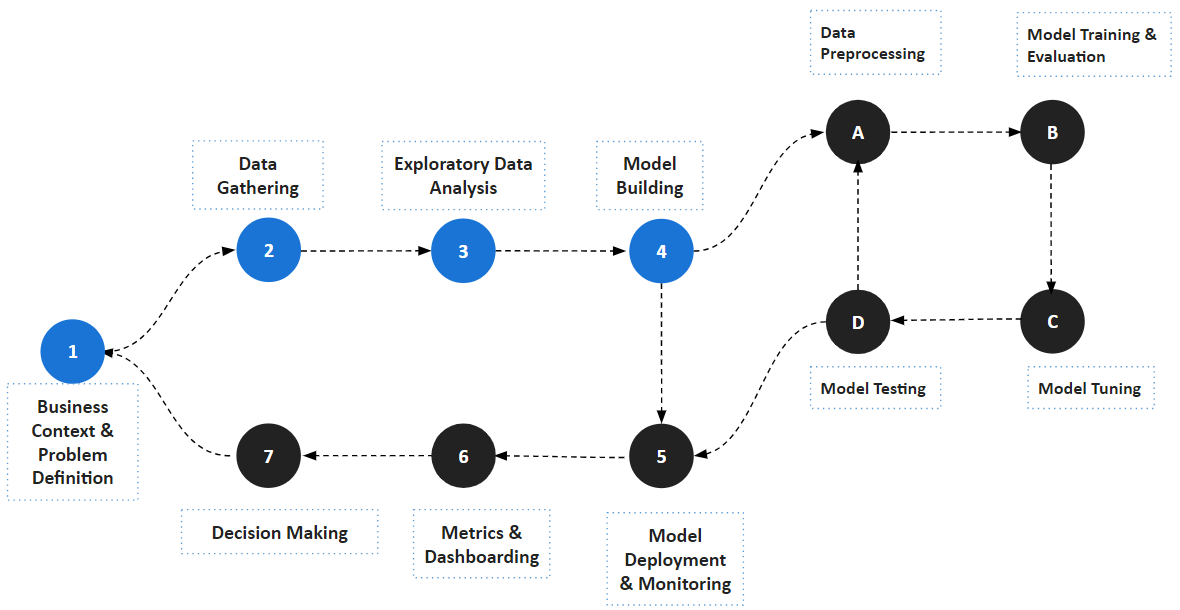

## **Model Training and Evalution**

Training an AI model is important because it allows machines to learn and perform tasks without explicit programming. It enables the following:

- **Learning from Data**
- **Generalization and Adaptability**
- **Optimization and Performance Improvement**

## Model Training and Evaluation

In [ ]:
# defining the model
tf.keras.backend.clear_session()                                               # Clears the Keras session to remove any existing models or layers

input_shape = (height, width, 3)                                               # Defines the input shape for the model (height, width, number of channels)
base_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',                                                        # Loads the pre-trained weights of the VGG16 model trained on ImageNet dataset
    include_top=False,                                                         # Excludes the top (fully connected) layers of the VGG16 model
    input_shape=input_shape
)
base_model.trainable = False                                                   # Freezes the weights of the VGG16 model to prevent further training

ai_model = tf.keras.Sequential()                                            # Creates a sequential model
ai_model.add(base_model)                                                    # Adds the VGG16 base model to the sequential model
ai_model.add(tf.keras.layers.GlobalAveragePooling2D())                      # Adds a global average pooling layer

ai_model.add(tf.keras.layers.Flatten())                                     # Flattens the input for the subsequent fully connected
ai_model.add(tf.keras.layers.Dense(3, activation='softmax'))                # Adds the final fully connected layer with 3 units and softmax activation

ai_model.compile(loss='SparseCategoricalCrossentropy',                      # Specifies the loss function for trainin
              optimizer=tf.keras.optimizers.Adam(0.001),                       # Sets the optimizer (Adam) and learning rate
              metrics=['acc'])                                                 # Specifies the metrics to evaluate the model's performance
ai_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,716,227 (56.14 MB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Model Training**

In [ ]:
import random
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/ai_model_best.model.keras', monitor='acc', verbose=1, mode='max',save_best_only=True) # defines file path to save the best model weights, define accuracy metric, verbose display updates of the model and saves best model
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)  #stops the model training if there is no improvement in metrics

callbacks_list = [checkpoint,early]

history = ai_model.fit(                                                     # Fit the model on training data
    train_data,                                                            # Training data generator
    validation_data = test_data,                                           # validation data generator
    epochs=25,                                                             # no of epochs to train the model
    shuffle=False,
    verbose=True,                                                          # Prints updates during training.
    callbacks=callbacks_list
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - acc: 0.5795 - loss: 0.9740   
Epoch 1: acc improved from -inf to 0.52381, saving model to model/ai_model_best.model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - acc: 0.5684 - loss: 0.9751 - val_acc: 0.3939 - val_loss: 1.0215
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.4958 - loss: 0.9482
Epoch 2: acc did not improve from 0.52381
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.4927 - loss: 0.9487 - val_acc: 0.3939 - val_loss: 1.0029
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5036 - loss: 0.9285
Epoch 3: acc did not improve from 0.52381
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - acc: 0.5042 - loss: 0.9283 - val_acc: 0.3939 - val_loss: 0.9797
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5361 - loss: 0.9118
Epoch 4: acc improved from 0.52381 to 0.54545, saving model to model/ai_model_best.model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.5380 - loss: 0.9104 - val_acc: 0.3939 - val_loss: 0.9565
Epoch 5/25
4/

**Model Evaluation**

In [ ]:
# Predict class probabilities for the training set using the generator
ypred_prob_train = ai_model.predict(train_data, verbose=1)

# Get predicted class labels from predicted probabilities
ypred_train = np.argmax(ypred_prob_train, axis=1)

# Get true class labels directly from the generator
ytrain = train_data.classes

# Optional: Print shapes to verify
print("✅ ytrain shape:", ytrain.shape)
print("✅ ypred_train shape:", ypred_train.shape)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
✅ ytrain shape: (231,)
✅ ypred_train shape: (231,)


In [ ]:
model_train_score = recall_score(ytrain, ypred_train, average='macro')
print("Model Score on Train Data:", np.round(100*model_train_score, 2))

Model Score on Train Data: 39.77


[Text(45.72222222222221, 0.5, 'True label')]

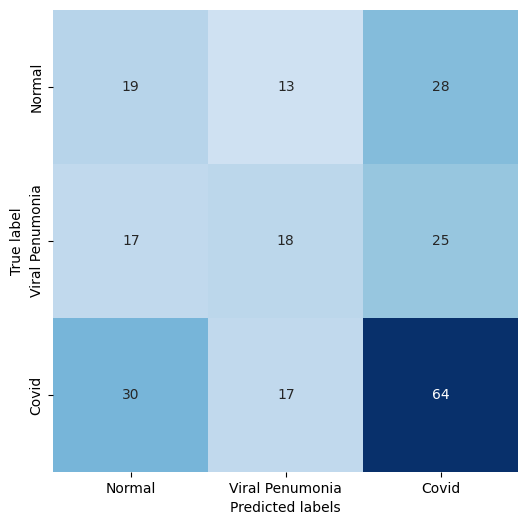

In [ ]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(6, 6))
# Compute the confusion matrix based on true and predicted labels
hm = sns.heatmap(confusion_matrix(ytrain,ypred_train), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted labels') # Set the x-axis label for the heatmap
hm.set(ylabel='True label') # # Set the y-axis label for the heatmap

In [ ]:
#model accuracy
ytest = np.array([])                                                           # Initialize an empty array for storing true labels of test data
xtest = []                                                                     # Initialize an empty list for storing test data

for i in range(math.ceil(len(test_data.classes)/batch_size)):                  # Loop over test generator batches to extract test data and true labels
    xtest.append(test_data[i][0])                                              # Append test data to xtest list
    ytest= np.concatenate((ytest,test_data[i][-1]))                            # Concatenate true labels to ytest array

xtest = np.concatenate((xtest),axis=0)                                         # Concatenate test data along the batch axis

ypred_prob_test =ai_model.predict(xtest)                                    # Predict probabilities for the test data
ypred_test = np.argmax(ypred_prob_test,axis=1)                                 # Predicted labels by selecting the class with the highest probability

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step


In [ ]:
model_test_score = recall_score(ytest, ypred_test, average='macro')
print("Model Score on test Data:", np.round(100*model_train_score, 2))

Model Score on test Data: 39.77


[Text(45.72222222222221, 0.5, 'True label')]

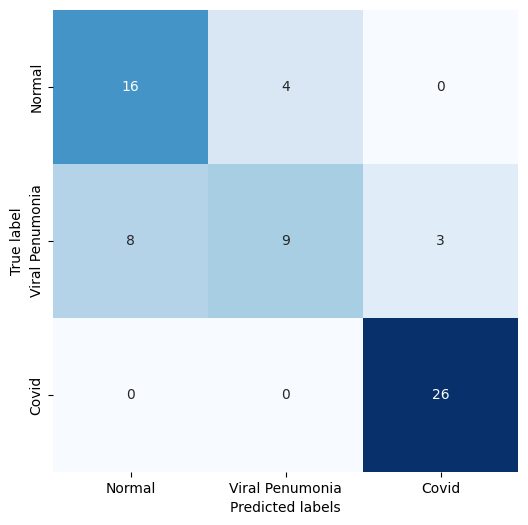

In [ ]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(6, 6))
# Compute the confusion matrix based on true and predicted labels
hm = sns.heatmap(confusion_matrix(ytest, ypred_test), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted labels') # Set the x-axis label for the heatmap
hm.set(ylabel='True label') # # Set the y-axis label for the heatmap

## Understanding Model Predictions and Business Consequences

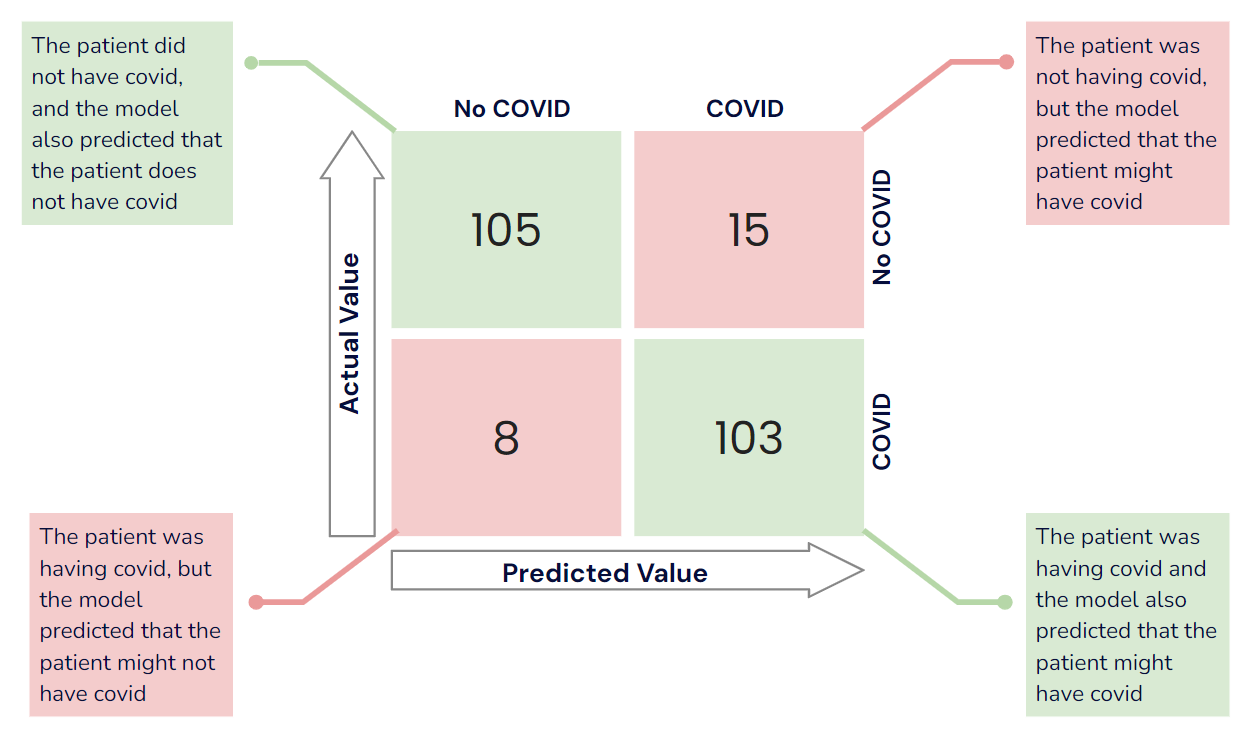

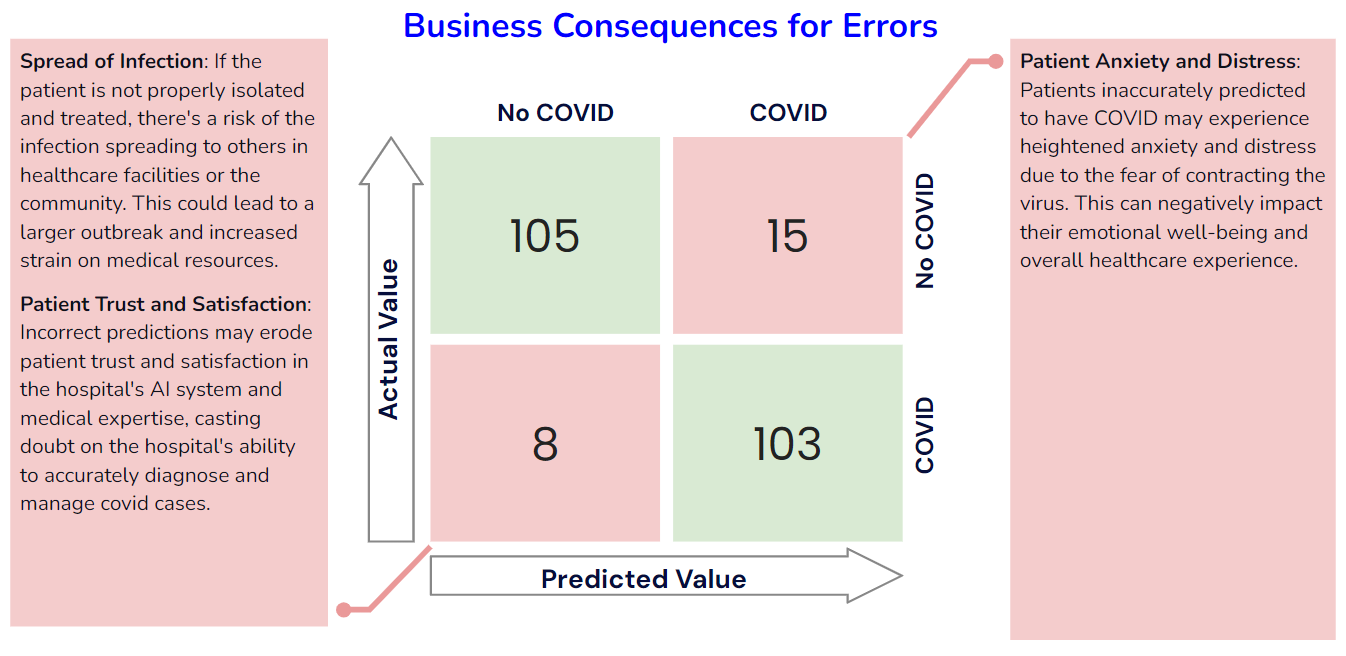

It is **much more important to ensure that patients who actually have the infection are correctly identified** based on their X-ray scan, even if it results in a few false COVID detections

- **The stakes are higher if the model identifies someone actually having COVID as non-COVID when compared to the case of people not having the infection being tagged as COVID positive**

## Observations from Model Evaluation

Our AI model has a score of 84% on the train data and 75% on the test data respectively.

- This score is pretty low considering our current scenario

- This becomes a worry as the ultimate goal would be to make predictions for new patients, and we do not want a model that will fail to predict COVID cases then.

## **Model Tuning**

Model tuning is important for

- **Optimizing Performance**
- **Determining the right fit**
- **Adapting to Data Characteristics**

In the current scenario, we are going to undertake two steps to tune the model

1. Since the number of images to train the data with is low, we will be 'synthetically creating' new data by applying various transformations to the existing images. These transformations create new variations of the data while maintaining the original label, resulting in a more diverse and robust training dataset. This helps in

    * **Increased Generalization**: By exposing it to different variations of the same data, the model generalizes better to new, unseen data. This helps prevent the scenario where the model becomes too specialized to the training data and performs poorly on new data.

    * **Improved Robustness**: By introducing variations in the training data, models become more robust to different lighting conditions, orientations, scales, and other factors that might be encountered in real-world scenarios.

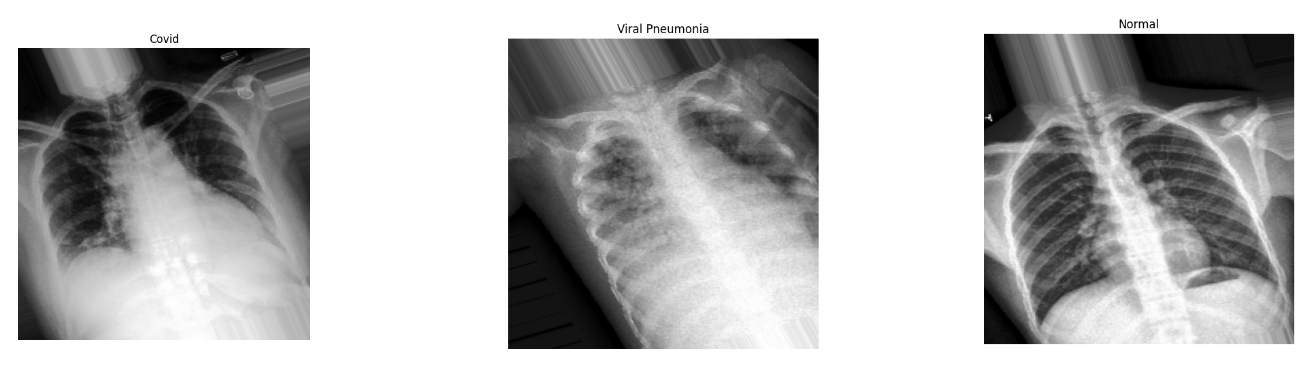

2. We'll update the base model by making additions to the architecture of the model.

## Model Tuning

In [ ]:
# function to visualize the images
def image_plot(generator, image_numbers):
    img_feature = generator[0][0][:image_numbers]
    img_label = generator[0][1][:image_numbers]

    plt.figure(figsize=(20, 15))
    for i in range(image_numbers):
        ax = plt.subplot(2, 3, i + 1)  # Use 2 rows and 3 columns for the subplot grid
        plt.imshow(img_feature[i])
        plt.title("Normal" if img_label[i] == 0 else "Viral Pneumonia" if img_label[i] == 1 else "Covid")
        plt.axis("off")

Found 231 images belonging to 3 classes.


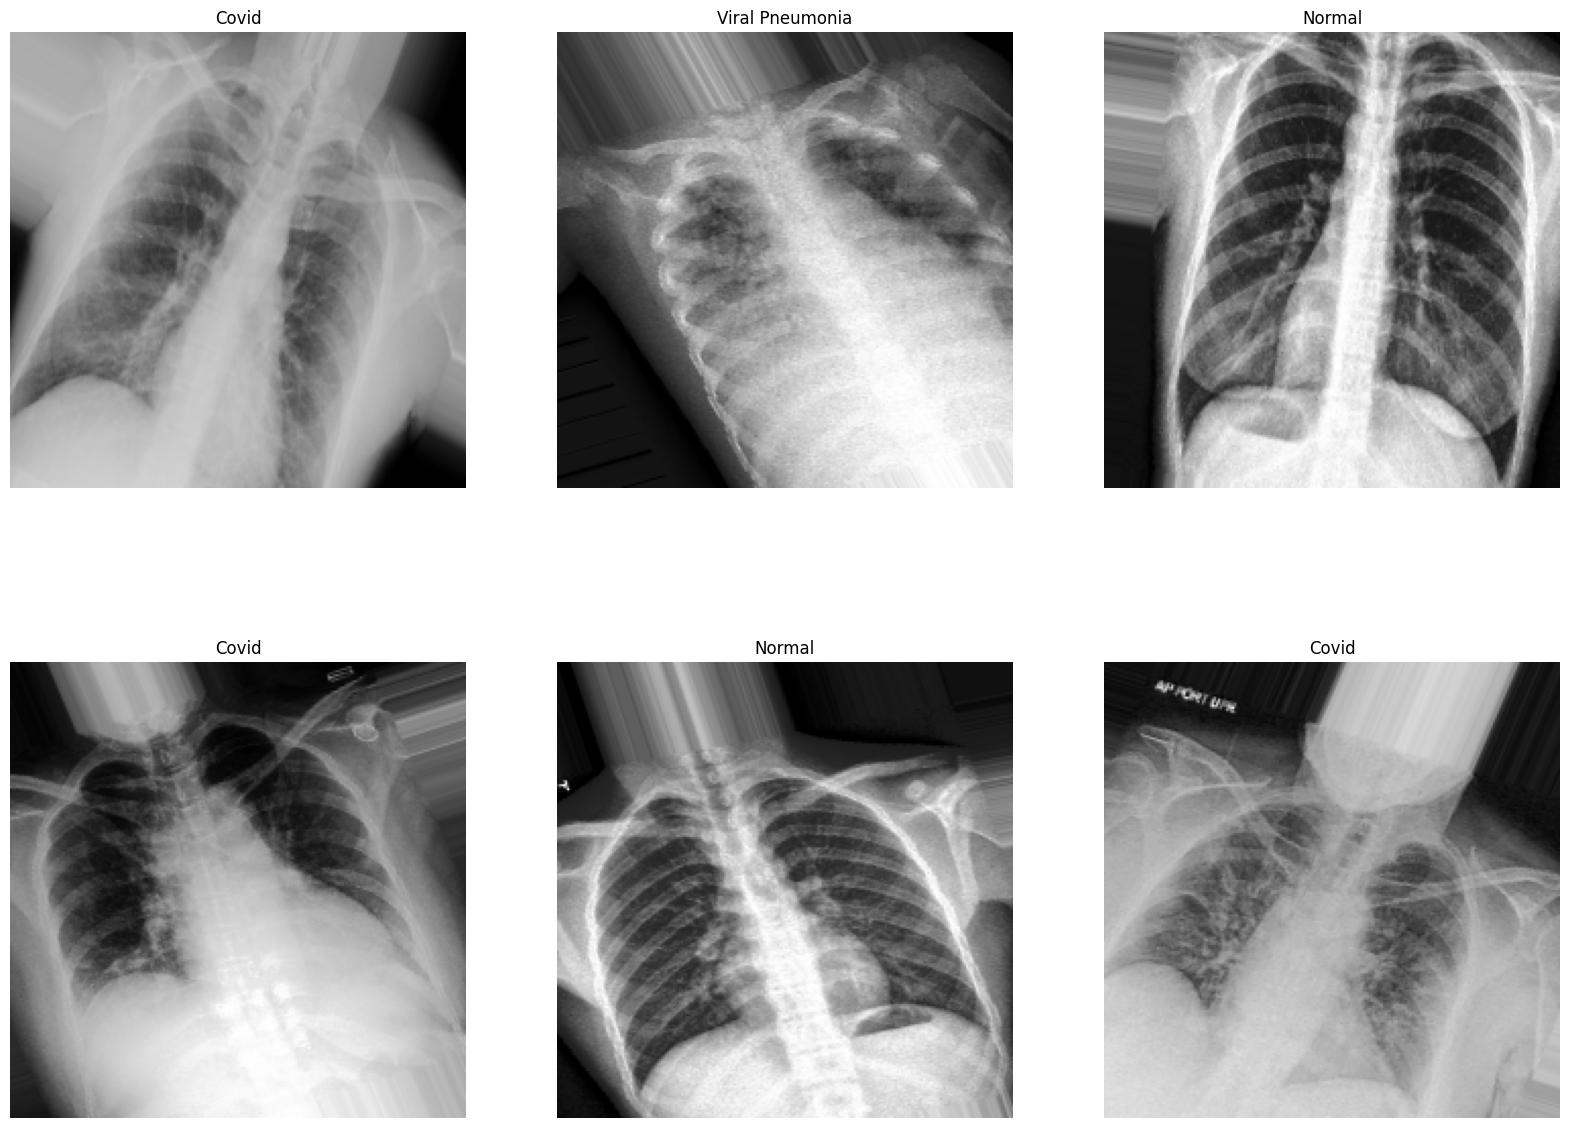

In [ ]:
# adding image augmentation
def generate_data_augmented(DIR):
    datagen = ImageDataGenerator(                                              # Image data generator is a function from tensorflow to perform rescaling, resizing, rotation, and other transformations.
        rescale=1./255.,                                                       # Rescale pixel values to [0, 1]
        zoom_range=0.2,                                                        # Randomly zooms images by a factor of 0.1
        rotation_range=25,                                                     # Randomly rotates images by up to 20 degrees
        width_shift_range=0.15,                                                # Randomly shifts images horizontally by 10% of the total width
        height_shift_range=0.15,                                               # Randomly shifts images vertically by 10% of the total height
        horizontal_flip = True                                                 # Randomly flips images horizontally
    )
    generator = datagen.flow_from_directory(
        TRAINING_DIR,                                                          # Directory containing the training images
        batch_size=batch_size,                                                 # Batch size for generating augmented data
        seed=42,                                                               # Seed value for random number generation
        class_mode='binary',                                                   # Type of class assignment ('binary' in this case)
        target_size=(height, width),                                           # Desired size (height, width) for the images
        classes={'Normal': 0, 'Viral Pneumonia': 1,'Covid': 2}                 # Mapping of class names to numerical labels
    )
    return generator

aug_train_data = generate_data_augmented(TRAINING_DIR)

image_plot(aug_train_data,6)

In [ ]:
# defining the model architecture
tf.keras.backend.clear_session()                                               # Clears the Keras session to remove any existing models or layers

input_shape = (height, width, 3)                                               # Defines the input shape for the model (height, width, number of channels)
base_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',                                                        # Loads the pre-trained weights of the VGG16 model trained on ImageNet dataset
    include_top=False,                                                         # Excludes the top (fully connected) layers of the VGG16 model
    input_shape=input_shape
)
base_model.trainable = False                                                   # Freezes the weights of the VGG16 model to prevent further training

tuned_ai_model = tf.keras.Sequential()                                            # Creates a sequential model
tuned_ai_model.add(base_model)                                                    # Adds the VGG16 base model to the sequential model
tuned_ai_model.add(tf.keras.layers.GlobalAveragePooling2D())                      # Adds a global average pooling layer

tuned_ai_model.add(tf.keras.layers.Flatten())                                     # Flattens the input for the subsequent fully connected
tuned_ai_model.add(tf.keras.layers.Dense(256, activation='relu'))                 # Adds a fully connected layer with 256 units and ReLU activation
tuned_ai_model.add(tf.keras.layers.Dropout(0.5))                                  # Applies dropout regularization to prevent overfitting
tuned_ai_model.add(tf.keras.layers.Dense(256, activation='relu'))
tuned_ai_model.add(tf.keras.layers.Dropout(0.5))

tuned_ai_model.add(tf.keras.layers.Dense(3, activation='softmax'))                # Adds the final fully connected layer with 3 units and softmax activation

tuned_ai_model.compile(loss='SparseCategoricalCrossentropy',                      # Specifies the loss function for trainin
              optimizer=tf.keras.optimizers.Adam(0.001),                       # Sets the optimizer (Adam) and learning rate
              metrics=['acc'])                                                 # Specifies the metrics to evaluate the model's performance
tuned_ai_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,912,579 (56.89 MB)

 Trainable params: 197,891 (773.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Directory to save model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/tuned_ai_model_best.model.keras',
    monitor='val_accuracy',            # ✅ use validation accuracy instead of 'acc'
    mode='max',
    verbose=1,
    save_best_only=True
)

# Early stopping
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,                        # ✅ reduce patience to 5 if val_loss doesn't improve
    restore_best_weights=True,
    verbose=1
)

# Optional: Reduce LR on plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,                        # ✅ reduce LR if stuck for 3 epochs
    verbose=1
)

callbacks_list = [checkpoint, early, reduce_lr]

# ✅ Set shuffle=True for generalization
# ✅ Use steps_per_epoch to avoid preloading full dataset in memory (if applicable)
history = tuned_ai_model.fit(
    aug_train_data,
    validation_data=test_data,
    epochs=50,
    shuffle=True,
    callbacks=callbacks_list,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - acc: 0.3629 - loss: 1.2098 - val_acc: 0.4394 - val_loss: 1.0472 - learning_rate: 0.0010
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - acc: 0.3927 - loss: 1.1752 - val_acc: 0.4394 - val_loss: 0.9691 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - acc: 0.4968 - loss: 1.0257 - val_acc: 0.6061 - val_loss: 0.9237 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - acc: 0.5668 - loss: 0.9806 - val_acc: 0.6818 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - acc: 0.5729 - loss: 0.8964 - val_acc: 0.7273 - val_loss: 0.8260 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - acc: 0.6409 - loss: 0.8080 - val_acc: 0.7727 - val_loss: 0.7702 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - acc: 0.6537 - loss: 0.8194 - val_acc: 0.8030 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - acc: 0.6579 - loss: 0.7782 - val_acc: 0.8030 - val_loss: 0.6502 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step -

**Model Evaluation**

In [ ]:
# Calculate steps based on dataset size and batch size
steps = math.ceil(len(aug_train_data.classes) / aug_train_data.batch_size)

# Reset the generator to start from the beginning
aug_train_data.reset()

# Predict directly using the generator
ypred_prob_train_tune = tuned_ai_model.predict(
    aug_train_data,
    steps=steps,
    verbose=1
)

# Ground truth labels (order is preserved if shuffle=False in generator)
ytrain = aug_train_data.classes

# Convert predicted probabilities to predicted class indices
ypred_train_tune = np.argmax(ypred_prob_train_tune, axis=1)


3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [ ]:
model_train_score = recall_score(ytrain, ypred_train_tune,average='macro')
print("Model Score on Train Data:", np.round(100*model_train_score, 2))

Model Score on Train Data: 32.37


[Text(45.72222222222221, 0.5, 'True label')]

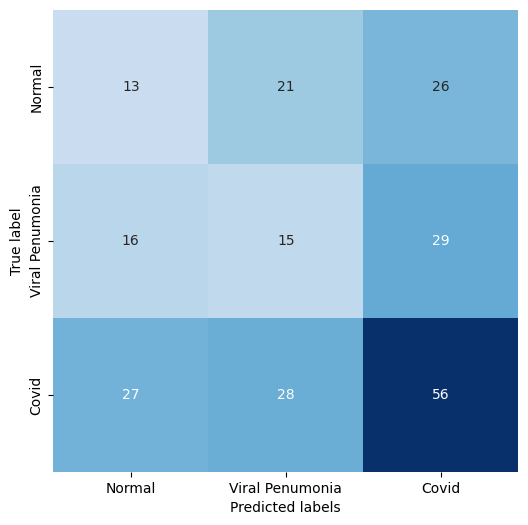

In [ ]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(6, 6))
# Compute the confusion matrix based on true and predicted labels
hm = sns.heatmap(confusion_matrix(ytrain,ypred_train_tune), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted labels') # Set the x-axis label for the heatmap
hm.set(ylabel='True label') # # Set the y-axis label for the heatmap

In [ ]:
ytest = np.array([])                                                           # Initialize an empty array for storing true labels of test data
xtest = []                                                                     # Initialize an empty list for storing test data

for i in range(math.ceil(len(test_data.classes)/batch_size)):                  # Loop over test generator batches to extract test data and true labels
    xtest.append(test_data[i][0])                                              # Append test data to xtest list
    ytest= np.concatenate((ytest,test_data[i][-1]))                            # Concatenate true labels to ytest array

xtest = np.concatenate((xtest),axis=0)                                         # Concatenate test data along the batch axis

ypred_prob_test_tune =tuned_ai_model.predict(xtest)                                    # Predict probabilities for the test data
ypred_test_tune = np.argmax(ypred_prob_test_tune,axis=1)                                           # Predicted labels by selecting the class with the highest probability

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step


In [ ]:
model_test_score = recall_score(ytest, ypred_test_tune,average='macro')
print("Model Score on Test Data:", np.round(100*model_test_score, 2))

Model Score on Test Data: 91.67


[Text(45.72222222222221, 0.5, 'True label')]

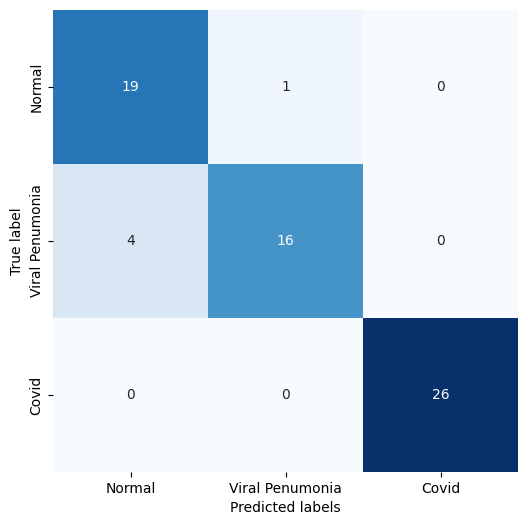

In [ ]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(6, 6))
# Compute the confusion matrix based on true and predicted labels
hm = sns.heatmap(confusion_matrix(ytest, ypred_test_tune), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted labels') # Set the x-axis label for the heatmap
hm.set(ylabel='True label') # # Set the y-axis label for the heatmap

## **Model Testing**

Model testing is important for:

- **Validating model performance**
- **Identifying and mitigating errors or flaws**
- **Assessing model robustness and generalizability**
- **Building user trust and confidence**

## Model Testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Model Score on Test Data: 91.67 




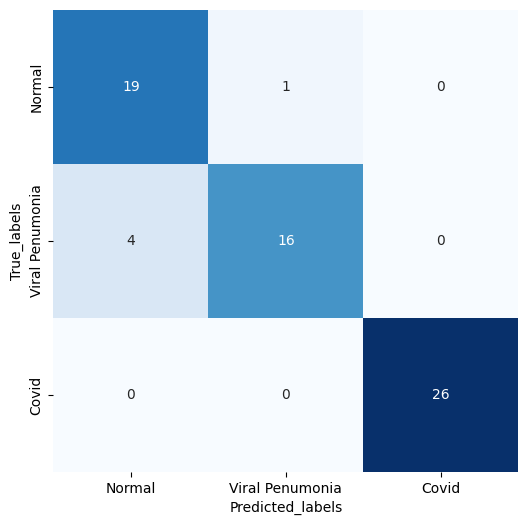

In [ ]:
ytest = np.array([])
xtest = []

for i in range(math.ceil(len(test_data.classes)/batch_size)):
    xtest.append(test_data[i][0])
    ytest= np.concatenate((ytest,test_data[i][-1]))

xtest = np.concatenate((xtest),axis=0)

ypred_prob = tuned_ai_model.predict(xtest)
ypred = np.argmax(ypred_prob,axis=1)

model_test_score = recall_score(ytest, ypred_test_tune,average='macro')
print("Model Score on Test Data:", np.round(100*model_test_score, 2), '\n\n')

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(ytest,ypred), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Normal','Viral Penumonia','Covid'],yticklabels=['Normal','Viral Penumonia','Covid'])
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels');

## Observations from Model Testing

- Our AI model has a score of ~90% on the test data, which is a good score.
- We can now move ahead to the next stage.

# **Model Deployment and Monitoring**

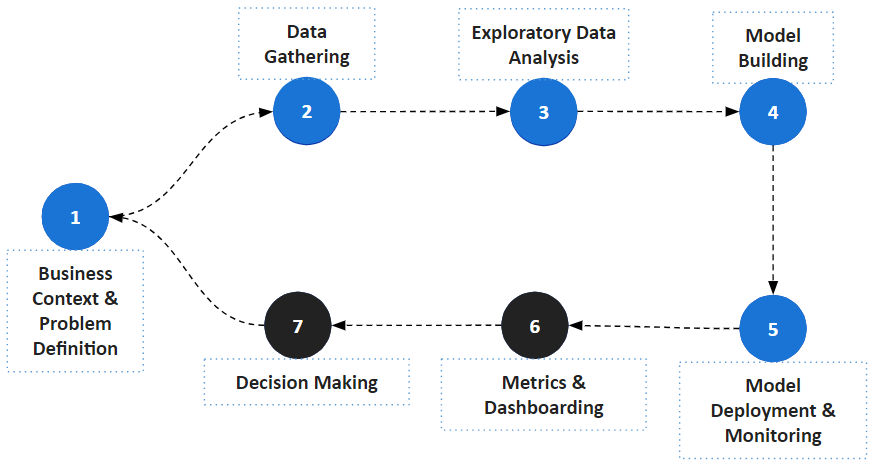

Model deployment helps with the following:

- **Realizing Value**
- **Scalability and Efficiency**
- **Continuous Learning and Improvement**
- **Business Impact and Decision Support**

## Model Deployment

In [ ]:
covid_detector = keras.models.load_model('/content/model/tuned_ai_model_best.model.keras')

In [ ]:
# creating the deployment input interface
image = gr.Image()

# creating the deployment output interface
label = gr.Label(num_top_classes=3)

In [ ]:
# defining the dimensions of the input image
height = 224
width = 224
dimensions = (width, height)

# defining the class names for predictions
class_names = {0: 'Normal', 1: 'Viral Pneumonia', 2: 'Covid'}

# define a function that will take the necessary inputs and make predictions
def predict_covid(image):
    # resizing the input image
    image = cv2.resize(image, dimensions, interpolation=cv2.INTER_LINEAR)
    image = image / 255.0
    # reshaping the image to match the model's input shape
    image = image.reshape((-1, 224, 224, 3))
    # making predictions using the loaded model
    prediction = covid_detector.predict(image).flatten()
    # formatting the results to return final results as class names
    return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
# defining the structure of the deployment interface and how the components will interact
demo = gr.Interface(
    fn=predict_covid,
    inputs = image,
    outputs = label,
    title="COVID Detection",
    description= "This interface will predict whether a given patient is normal, has viral pneumonia, or has COVID based on chest X-ray scan provided.",
    allow_flagging="never"
)

In [ ]:
# Define the class names (example: modify this based on your actual classes)
class_names = list(train_data.class_indices.keys())

# Define a prediction function
def predict_image(img):
    img = img.resize((img_size, img_size))  # replace img_size with your actual model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # scale if your model expects normalized input

    predictions = tuned_ai_model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = float(np.max(predictions[0]))

    return {predicted_class: confidence}

# Create Gradio interface
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="AI Image Classifier",
    description="Upload an image to classify using the trained AI model"
)


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
def predict_image(img):
    img = img.resize((64, 64))  # match model input size
    img = np.array(img) / 255.0
    img = img.reshape(1, 64, 64, 3)  # add batch dimension
    prediction = tuned_ai_model.predict(img)
    predicted_class = np.argmax(prediction)
    return str(predicted_class)

In [ ]:
# deploying the model

def predict_image(img):
    img = img.resize((64, 64))                # Resize to match model input
    img = np.array(img) / 255.0               # Normalize
    img = img.reshape(1, 64, 64, 3)           # Add batch dimension
    prediction = tuned_ai_model.predict(img)
    predicted_class = np.argmax(prediction)
    return str(predicted_class)

demo = gr.Interface(fn=predict_image, inputs=gr.Image(type="pil"), outputs="text")
demo.launch(share=True, show_error=True)


In [ ]:
# shutting down the deployed model
demo.close()

Closing server running on port: 7863


## Types of Model Deployment

There are generally two main modes of making predictions with a deployed AI model:

- **Batch Prediction**: In batch prediction mode, predictions are made on a batch of input data all at once. This mode is suitable when you have a large set of data that needs predictions in a batch process, such as running predictions on historical data or performing bulk predictions on a scheduled basis.

- **Real-time (or Interactive) Prediction**: In real-time or interactive prediction mode, predictions are made on individual data points in real-time as they arrive. This mode is suitable when you need immediate or on-demand predictions for new and incoming data.

The choice of prediction mode depends on the specific requirements and use case of the deployed AI model. Batch prediction is preferable when efficiency in processing large volumes of data is important, while real-time prediction is suitable for scenarios that require immediate or interactive responses to new data.

# **Metrics and Dashboarding**

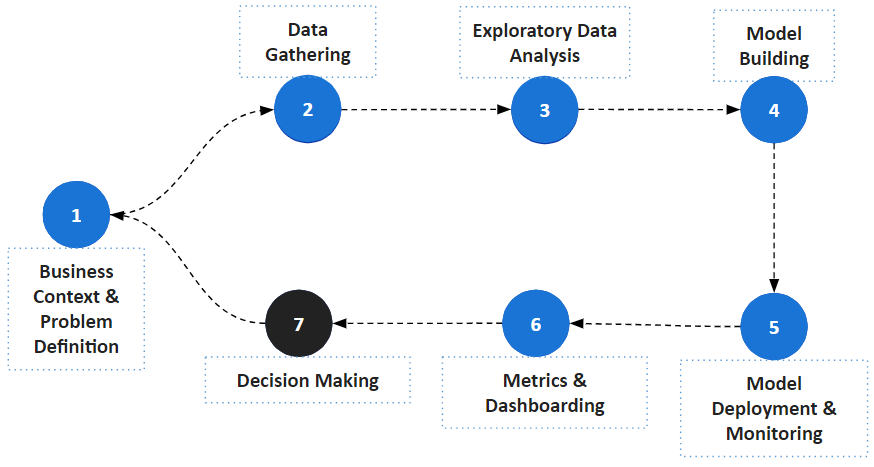

Metrics and dashboarding are the tools that businesses use to track their performance. Some of the benefits of using metrics and dashboarding:

- **Improved decision-making**
- **Increased efficiency**
- **Increased visibility**

### Dashboard for the Data Team

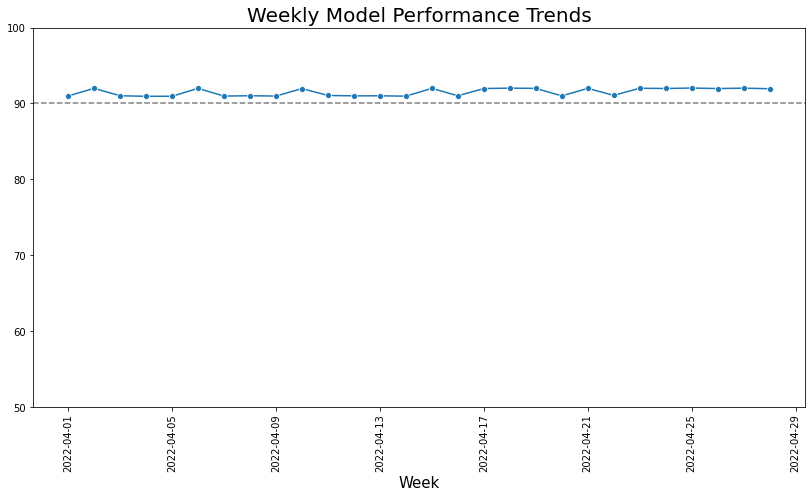

**Note**: The above chart is indicative in nature.

# **Decision Making**

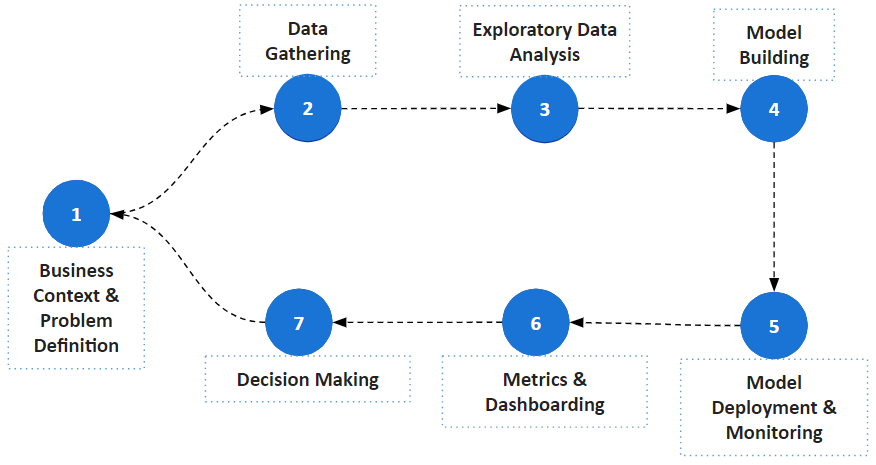

We have built an AI model, tested it, deployed it, and used the model's outputs to visualize the important business metrics via dashboards. Now the final step is to use the AI model for decision-making and determine the impact of implementing the AI solution.

**The trends of model performance useful for the Data Team.** They can use it to

- monitor the model's performance over time
- set thresholds for the acceptable lower limit of model performance
- decide when to retrain the model

**Healthcare personnel (doctors, radiologists, etc.) can use the AI solution to take a call on cases where the model's predictions are on the edge.**

- For example, based on the X-ray scan, the model predicts that there is a 40% chance that the person has COVID, the heathcare personnel can take a final call by examining the X-ray scan and model output together
- This can ensure that the COVID detection is more accurate

**Let's assess the impact of our AI solution.**

- The model can make a prediction regarding the presence of COVID based on an X-ray image in less than 5 seconds
- The AI solution can yield results within 15 minutes of the X-ray scan, compared to the 4-hour TAT of an RT-PCR test
- This shows that the **AI solution can provide a preliminary COVID diagnosis 16 times faster than traditional methods.**
- Assuming that 50 patients get screened using RT-PCR every hour and 10 samples can be processed at once, it would take approx. two days to get the test results of the 50 patients.
    - We have considered 12 working hours a day
- For the same 50 patients, assuming that we can process only one X-ray scan at a time, it would take approx. a day to get the test results of the 50 patients.
- **So, we can get the preliminary diagnosis of patients done in half the time with the AI solution**.

**Note**: The above numbers are indicative in nature.